# SPATIAL ANALYSIS OF ISS DATASETS

This tutorial is an example of how to use Squidpy to analyze In Situ Sequencing datasets, performing several different statistical tests to understand the spatial organization of tissues. This tutorial follows the scanpy tutorial/pciseq tutorials, so we'll take as an input an h5 object created. More information, if needed, can be found at: https://squidpy.readthedocs.io/en/stable/tutorials.html

# Loading the needed packages

The first step is to load the needed packages. If any of them fails, please go and check that they are installed in the appropiate environment

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import squidpy as sq
import scanpy as sc
import os

# Load your dataset

We are going to load our dataset, were we have alredy performed clustering, from an h5ad file. If you want to check how to format your data in this format, please check the Scanpy tutorial

In [2]:
adatall=sc.read('/mnt/d/ISS/adata_baysor/adata_16samples_clustered_log_annotated_curated_notln_adata4_180123_allcts.h5ad')

/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata=adatall
adata.obsm["spatial"]=np.array([adata.obs.x,adata.obs.y,adata.obs.y]).transpose().astype('float64')

In [5]:
#adata.obs.to_csv('/mnt/c/Users/sergio.salas/Documents/PhD/projects/DIPG/UMPED65_A2_2_celltypes.csv')

In [ ]:
for samp in adata.obs['sample'].unique():
    asub=adata[adata.obs['sample']==samp]
    print(samp)
    plt.figure(figsize=(50,50))
    sc.pl.spatial(
    asub,
    color="annotation_2",
    neighbors_key="spatial_neighbors",
    spot_size=70,
    edges=False,
    edges_width=2,
    img_key=None,
    )

# NEIGHBORHOOD PLOTS

In [7]:
adata

AnnData object with n_obs × n_vars = 221490 × 159
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'region', 'n_genes', 'n_counts', 'counts_markers', 'leiden2', 'reference', 'old_annotation', 'annotation_3', 'annotation_2', 'annotation_1', 'leiden', 'previous_annotation', 'celltype_annotated', 'celltype_annotated_epi', 'ID', 'celltype_annotated_refined', 'celltype_annotated_general', 'cell_class'
    uns: 'celltype_annotated_colors', 'celltype_annotated_epi_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs['name']=adata.obs['celltype_annotated_general']

In [9]:
ad=adata[~adata.obs['region'].isin(['TLN'])]

In [10]:
anndata_list = []
for sample in ad.obs['sample'].unique():
    adata_copy_int = ad[ad.obs['sample'] == sample ]
#    adata_copy_int.obs.index = list(pd.DataFrame(list((adata_copy_int.obs['sample'])))[0] +'_' +pd.DataFrame(list((adata_copy_int.obs.index)))[0])
    sq.gr.spatial_neighbors(adata_copy_int,radius=250.0)
    arrs=((adata_copy_int.obsp['spatial_distances']>0).toarray())*1
    datf=pd.DataFrame(arrs)
    datf['key']=list(adata_copy_int.obs['name'])
    neighmatrix=datf.groupby('key').sum().transpose()
    adataneigh=sc.AnnData(neighmatrix)
    adataneigh.obs=adata_copy_int.obs
    adataneigh.obs['counts']=list(np.sum(neighmatrix,axis=1))
    anndata_list.append(adataneigh)
ad_sp_concat = sc.concat(anndata_list, pairwise=True,join='outer')

/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)


/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)
/tmp/ipykernel_161/620081431.py:10: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adataneigh=sc.AnnData(neighmatrix)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [11]:
adataneigh=ad_sp_concat#[:,ad_sp_concat.var.index.isin(['MES_like','Cycling','OPC_like','AC_like','OC_like'])]
adataneigh.obsm["spatial"]=np.array([adataneigh.obs.x,adataneigh.obs.y]).transpose().astype('float64')
adataneigh.X=np.nan_to_num(adataneigh.X)
adataneigh=adataneigh[adataneigh.obs['counts']>5]
#adataneigh=adataneigh[adataneigh.obs['counts']<80]

In [12]:
sc.pp.filter_cells(adataneigh,min_genes=2)

/home/sergioms/.local/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [13]:
adataneigh.raw=adataneigh
#sc.pp.log1p(adataneigh)
#sc.pp.normalize_total(adataneigh, target_sum=1e4)


In [14]:
sc.pp.neighbors(adataneigh, n_neighbors=12)
sc.tl.umap(adataneigh,min_dist=0.05)
sc.set_figure_params(scanpy=True, dpi=200)

/home/sergioms/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-01-25 10:11:24.777215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 10:11:25.140055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 10:11:25.140123: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 10:1

In [15]:
sc.tl.leiden(adataneigh,resolution=0.4,key_added='clusters')

In [16]:
tab=adataneigh.obs.groupby('clusters').count()
#adataneigh=adataneigh[adataneigh.obs['clusters'].isin(tab.loc[tab.loc[:,'age']>40].index)]
adataneigh.var.index=adataneigh.var.index.astype(str)

In [ ]:
#plt.rcParams['plt.facecolor'] = 'white'
sc.pl.umap(adataneigh,color=['clusters'])#,save='UMAP_10X_colors.svg')

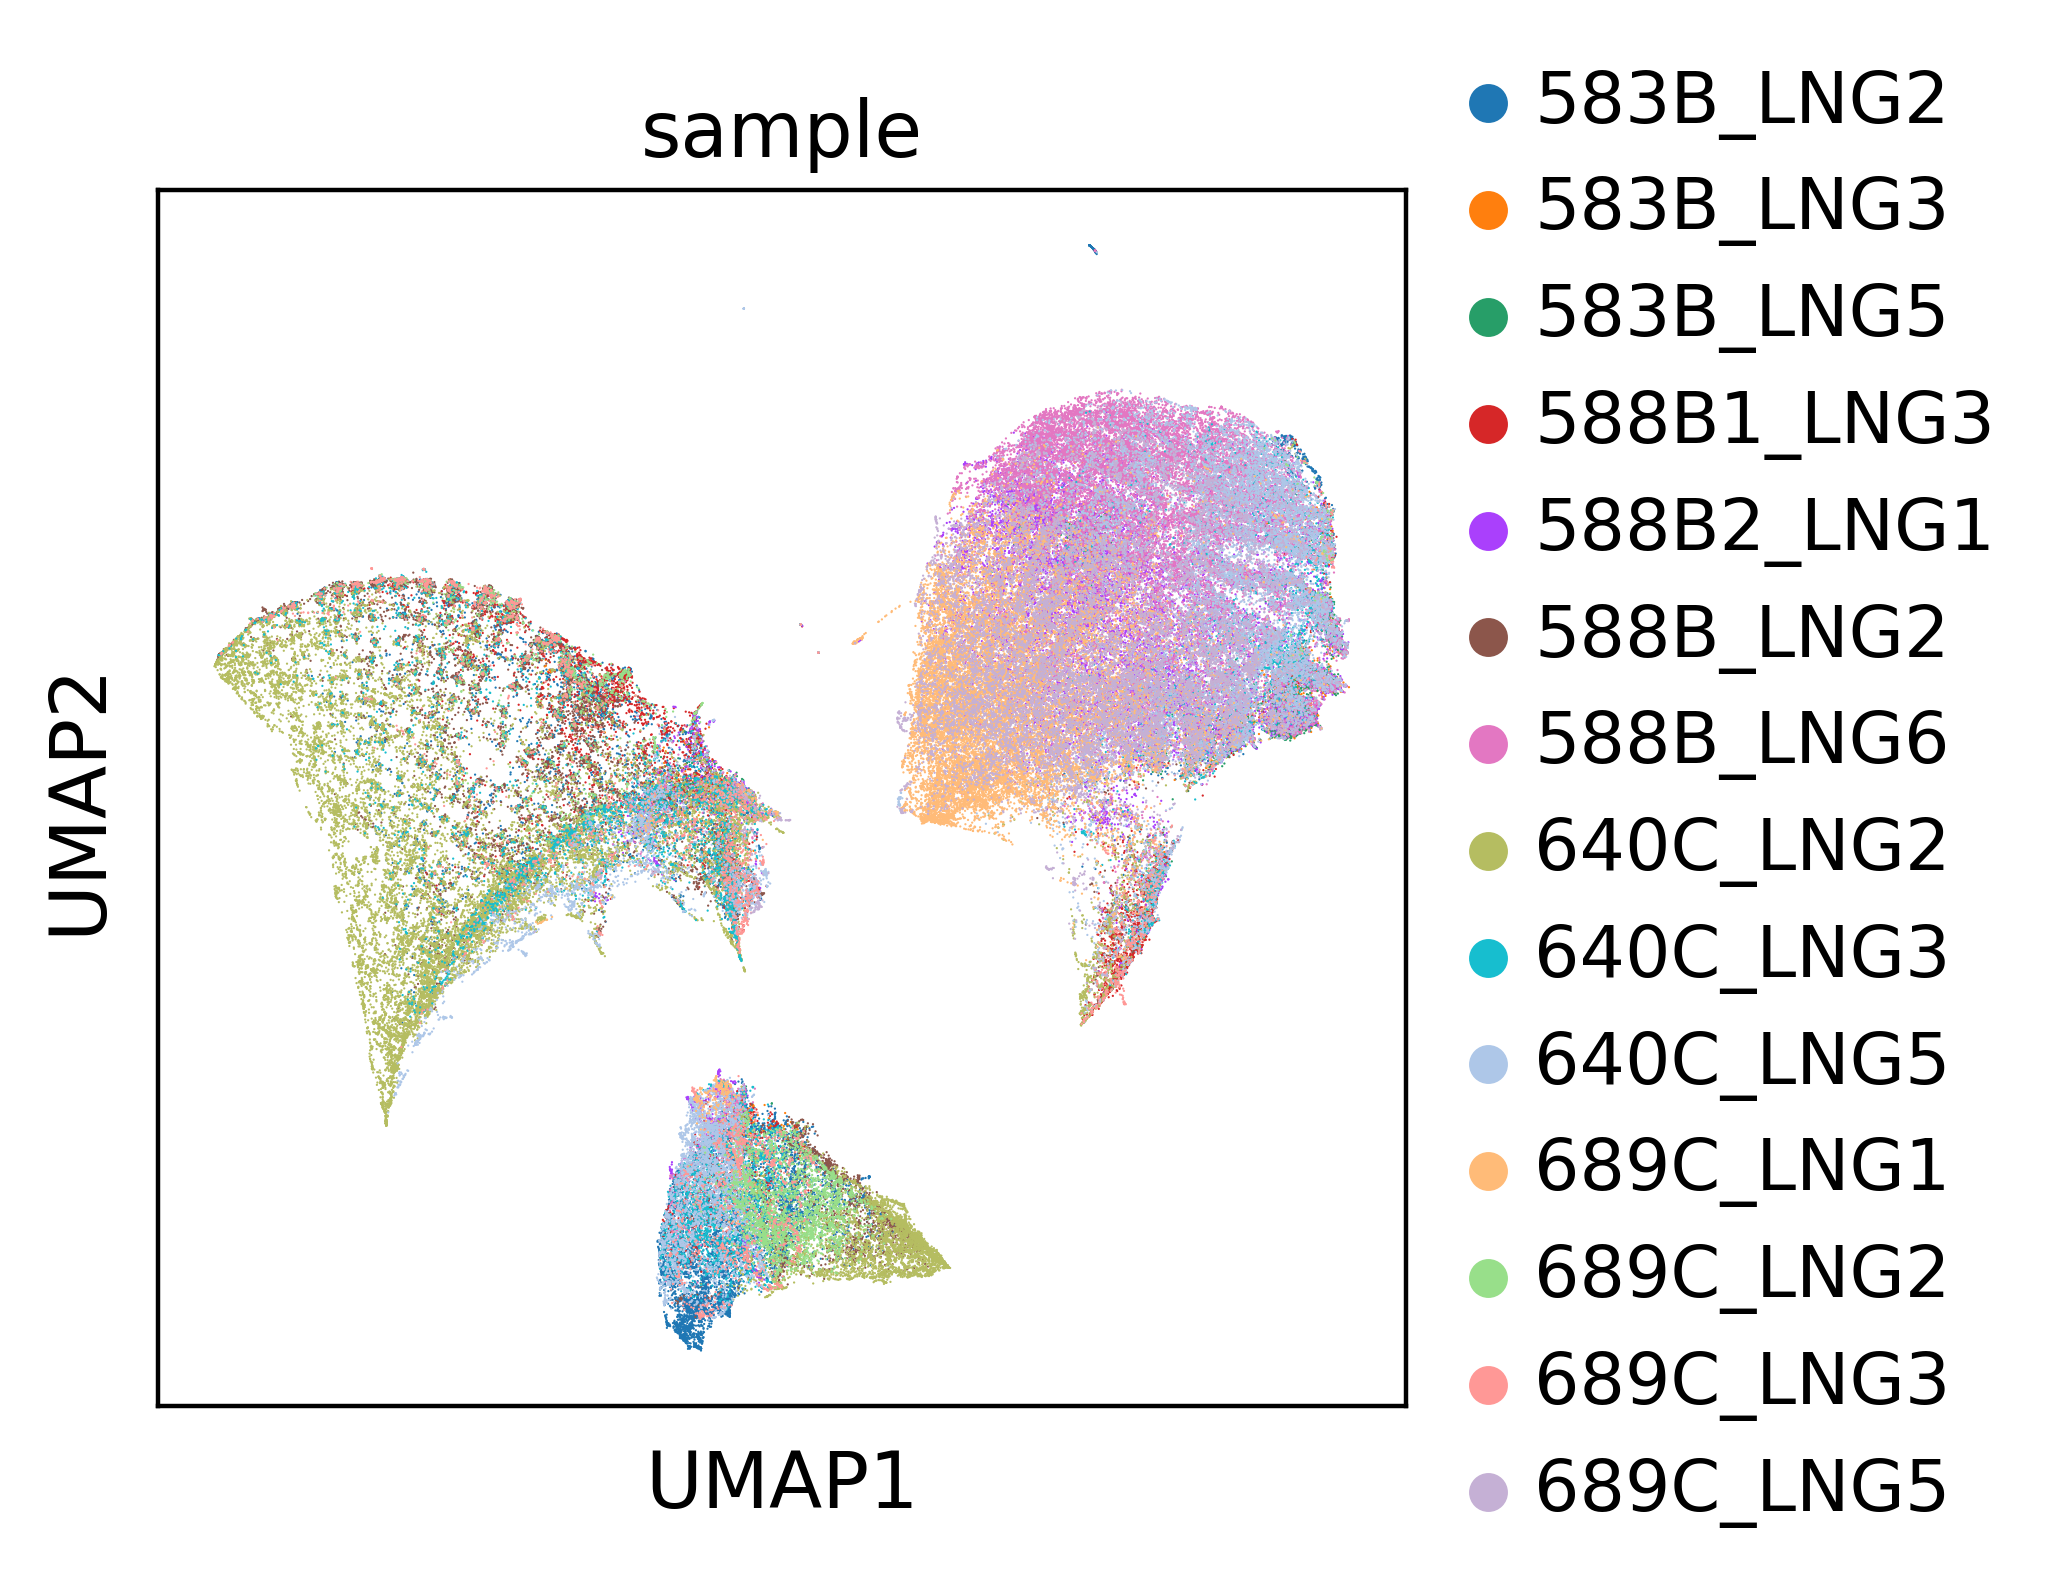

In [18]:
#plt.rcParams['plt.facecolor'] = 'white'
sc.pl.umap(adataneigh,color=['sample'])#,save='UMAP_10X_colors.svg')

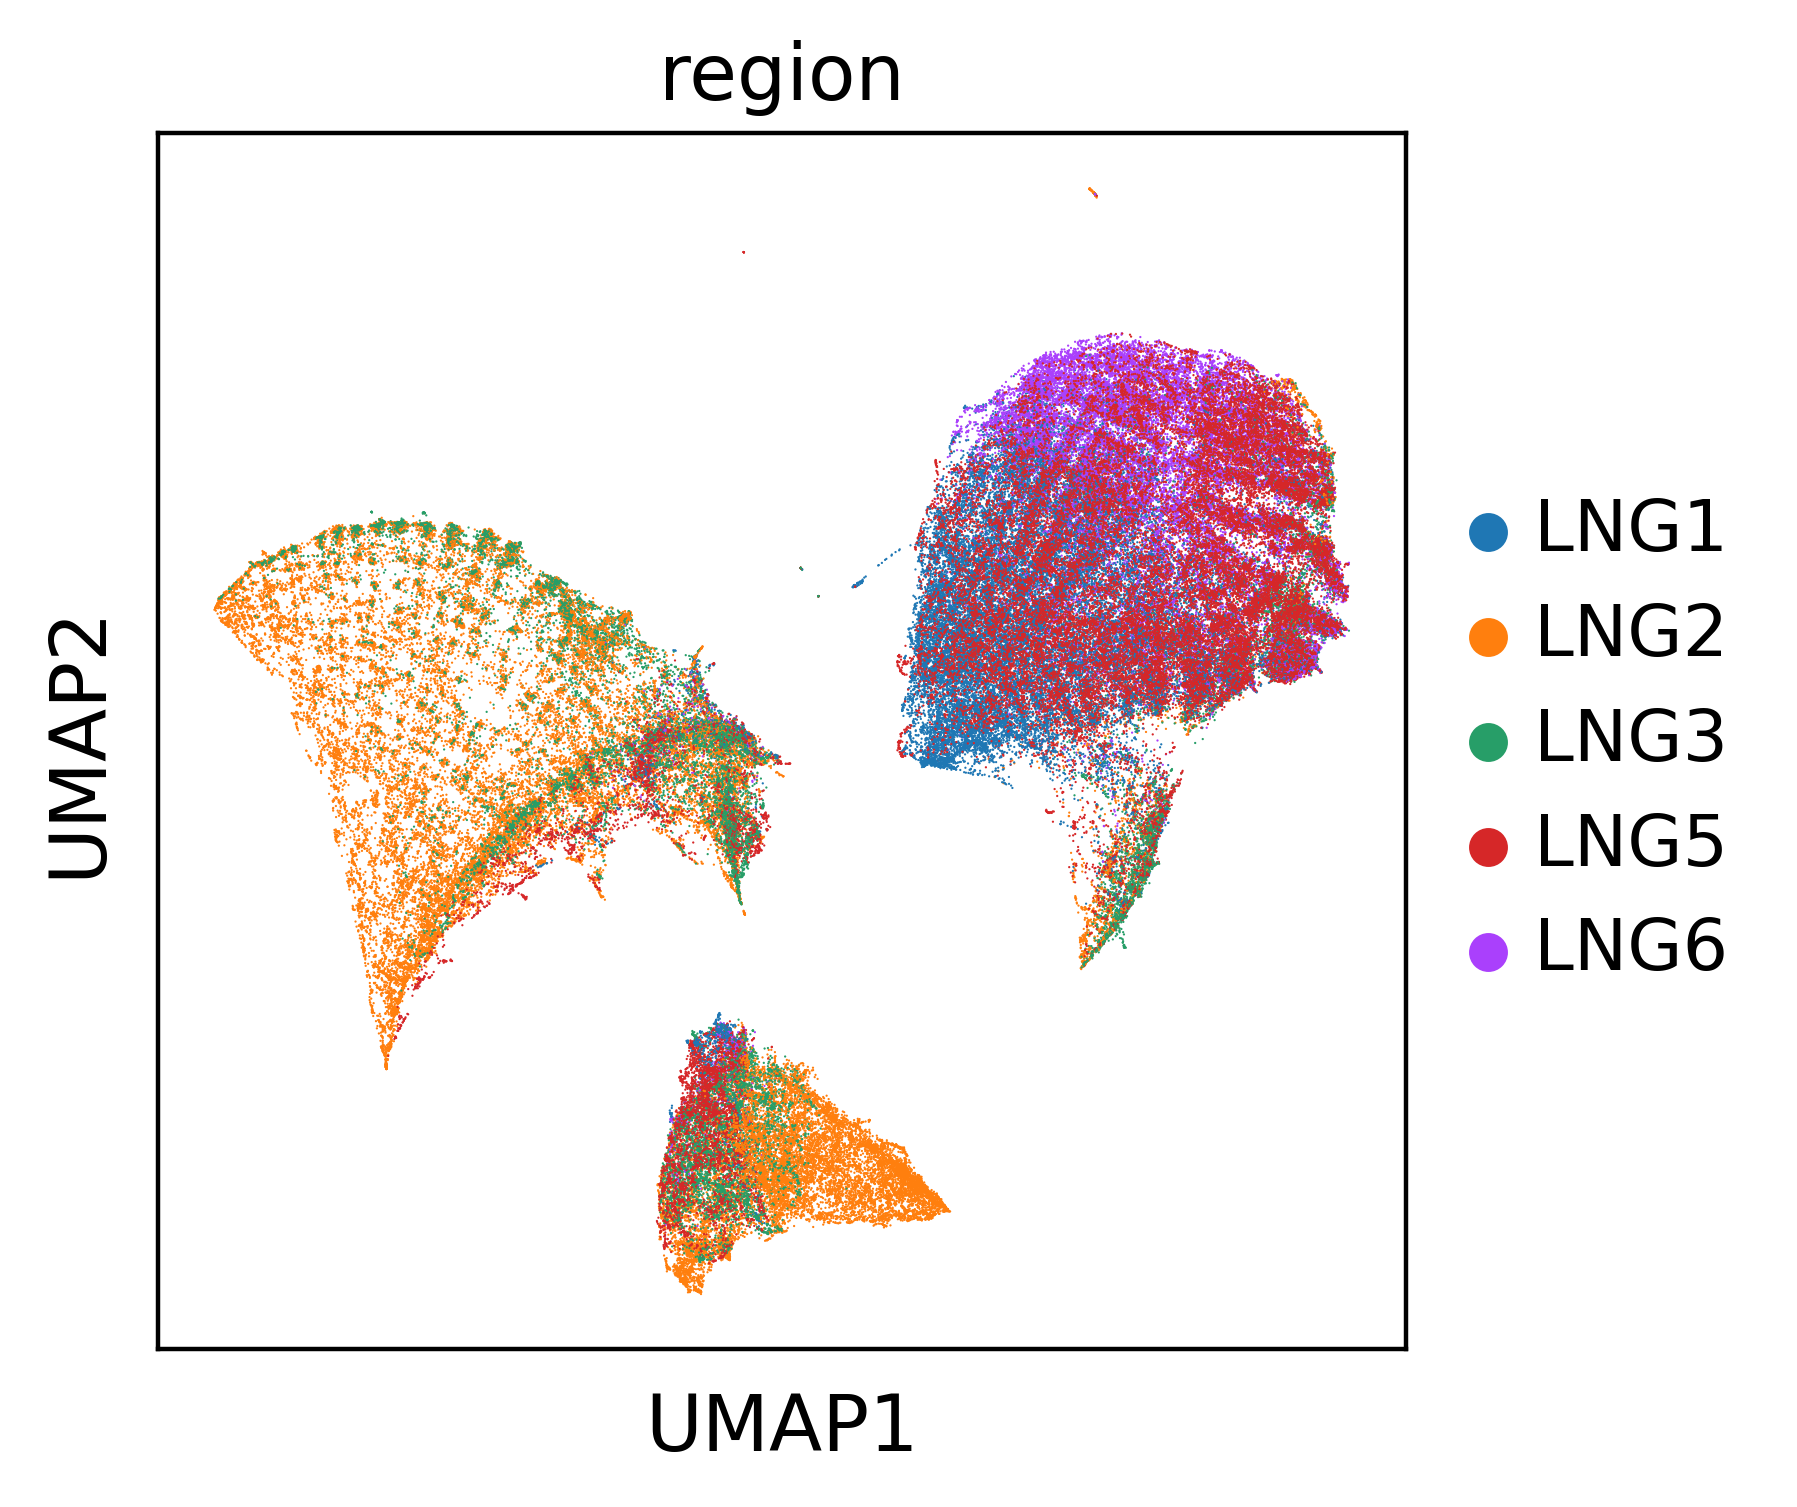

In [19]:
#plt.rcParams['plt.facecolor'] = 'white'
sc.pl.umap(adataneigh,color=['region'])#,save='UMAP_10X_colors.svg')

In [10]:
dic=pd.read_csv('/mnt/e/ISS/annotations_dicts/colors_celltype_annotated_general.csv',sep=';')
dictio=dict(zip(dic['celltype_annotated_general'],dic['color']))

In [11]:
adataneigh.uns['celltype_annotated_general_colors']=[dictio[s] for s in  np.unique(adataneigh.obs['celltype_annotated_general'])]

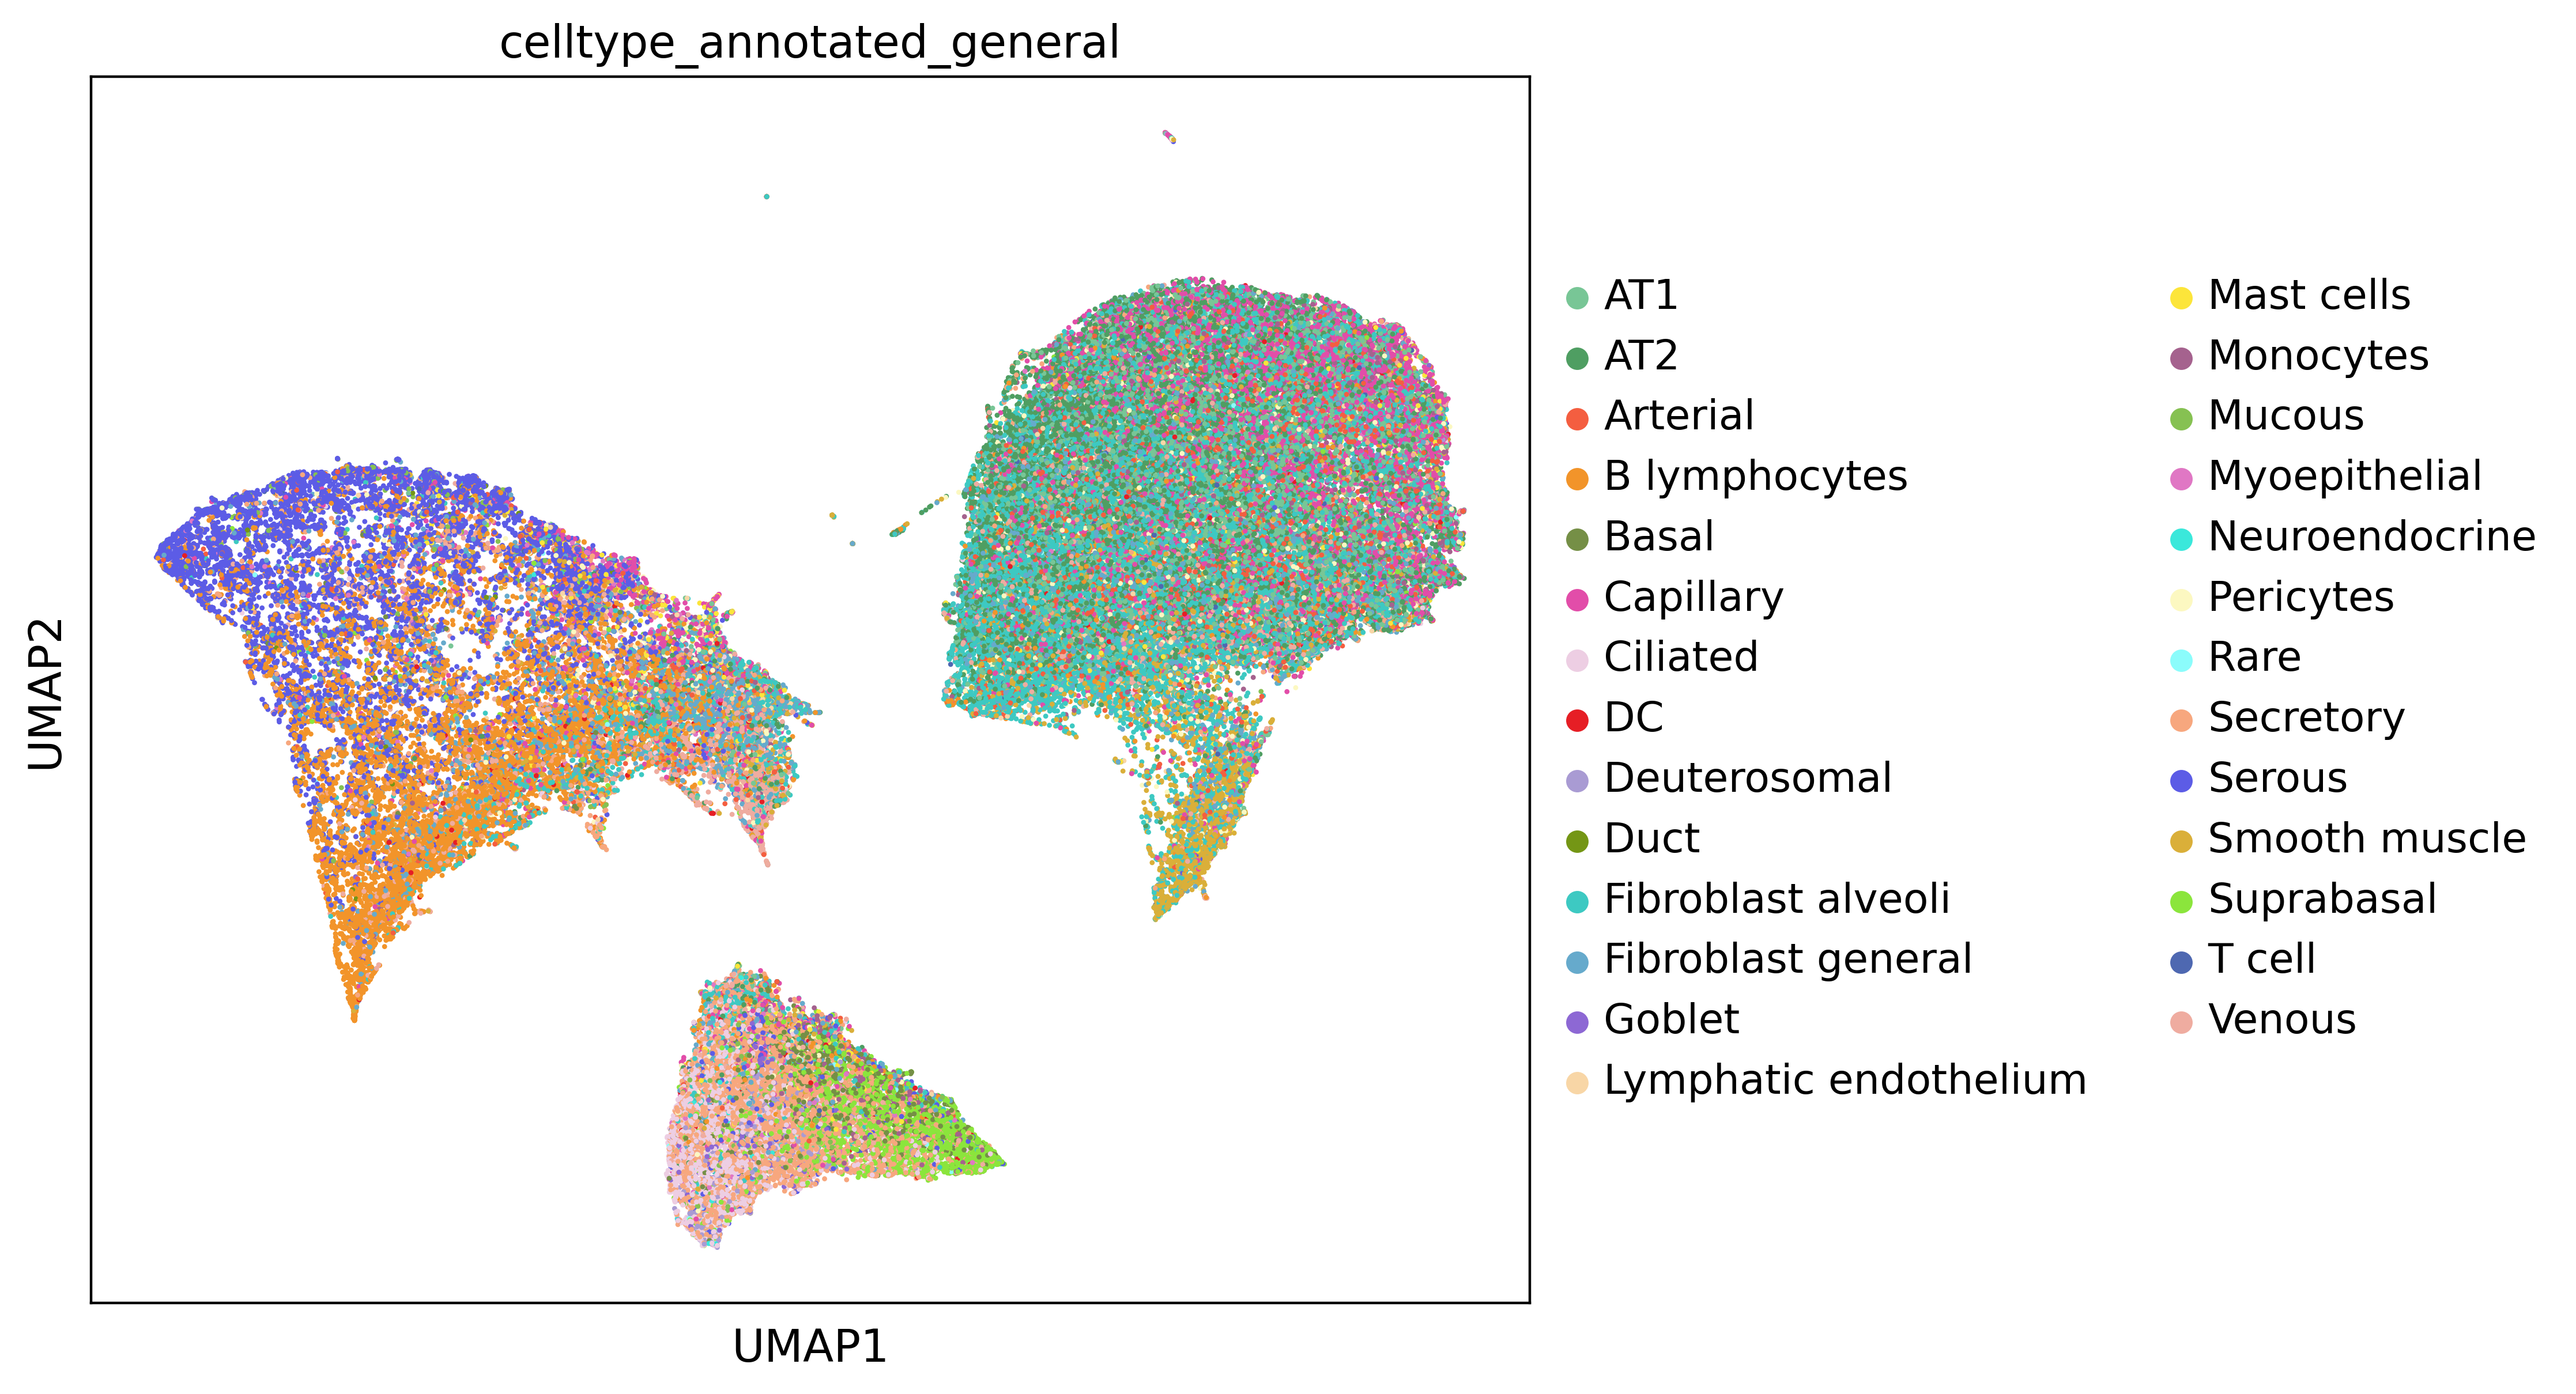

In [18]:
#plt.rcParams['plt.facecolor'] = 'white'
sc.set_figure_params(figsize=(8,7),dpi=200)
sc.pl.umap(adataneigh,color=['celltype_annotated_general'],s=10)#,save='UMAP_10X_colors.svg')

In [ ]:
#plt.rcParams['plt.facecolor'] = 'white'
sc.pl.umap(adataneigh,color=adataneigh.var.index)#,save='UMAP_10X_colors.svg')

In [27]:
for  adataneigh.var.index:
    plt.rcParams['plt.facecolor'] = 'white'
    sc.pl.umap(adataneigh,color=['celltype_annotated_general'])#,save='UMAP_10X_colors.svg')

SyntaxError: invalid syntax (3631753986.py, line 1)

In [29]:
adataneigh.write('/mnt/d/ISS/adata_baysor/adata_16samples_clustered_log_annotated_curated_notln_090123_allcts_neighbors.h5ad')

In [3]:
import scanpy as sc
adataneigh=sc.read('/mnt/e/ISS/adata_baysor/adata_16samples_clustered_log_annotated_curated_notln_090123_allcts_neighbors.h5ad')

/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adataneigh

AnnData object with n_obs × n_vars = 184433 × 27
    obs: 'cell', 'x', 'y', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'sample', 'region', 'n_genes', 'n_counts', 'counts_markers', 'leiden2', 'reference', 'old_annotation', 'annotation_3', 'annotation_2', 'annotation_1', 'leiden', 'previous_annotation', 'celltype_annotated', 'celltype_annotated_epi', 'ID', 'celltype_annotated_refined', 'celltype_annotated_general', 'cell_class', 'name', 'counts', 'clusters', 'X', 'Y'
    uns: 'celltype_annotated_general_colors', 'clusters_colors', 'leiden', 'neighbors', 'region_colors', 'sample_colors', 'umap'
    obsm: 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [31]:
#adataneigh.var.index=adataneigh.var.index+'_neighbors'

In [32]:
def map_of_clusters(adata,key='leiden',clusters='all',size=8,background='white',figuresize=(10,7),save=None,format='pdf'):
    
    #PARAMETERS TO MODIFY:
    #-key: the terms in adata.obs that you want to plot
    #-clusters:'all' for plotting all clusters in a single plot, 'individual': for plots of individual genes, or ['3','5'] (your groups
    #          between square brackets to plot only some clusters
    #-size: to change the size of your spots
    #-background: to change the color of the background
    #-figuresize: to specify the size of your figure
    #-save: if you want to save your figure, give the PATH of the folder where you want to save it
    #-format: specify the format in which you want to save your figure
    
    try:
        adata.obs[key]=adata.obs[key].astype(int)
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    except:
        colors=dict(zip(np.unique(adata.obs[key]),adata.uns[key+'_colors']))
    #cl.apply(lambda x: colors[x])
    plt.rcParams['figure.facecolor'] = background
    if clusters=='all':
        cl=adata.obs[key]
        plt.figure(figsize=figuresize)
        figa=plt.scatter(x=adata.obs.X,y=adata.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        if not save==None:
            plt.savefig(save +'/map_all_clusters_'+str(size)+'_'+background+'_'+key+'.'+format)
    elif clusters=='individual':
        cl=adata.obs[key]
        for each in adata.obs[key].unique():
            adatasub=adata[adata.obs[key]==each]
            plt.figure(figsize=figuresize)
            plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
            cl=adatasub.obs[key]
            plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
            plt.axis('off')
            plt.title('Group: '+ str(each))
            if not save==None:
                plt.savefig(save +'/map_inidivdual_cluster_'+str(each)+'_'+str(size)+background+'_'+key+'.'+format)
    else:
        adatasub=adata[adata.obs[key].isin(clusters)]
        plt.figure(figsize=figuresize)
        plt.scatter(x=adata.obs.X,y=adata.obs.Y,c='grey',s=size/5,linewidths=0, edgecolors=None)
        cl=adatasub.obs[key]
        plt.scatter(x=adatasub.obs.X,y=adatasub.obs.Y,c=cl.apply(lambda x: colors[x]),s=size,linewidths=0, edgecolors=None)
        plt.axis('off')
        plt.legend()
        if not save==None:
                s=''
                for element in clusters:
                    s=s+str(element)
                print(s)
                plt.savefig(save +'/map_group_of_clusters_'+str(s)+'_'+str(size)+background+'_'+key+'.'+format)
#        plt.title('Group: '+ paste(clusters))

In [33]:
adataneigh.obs['X']=adataneigh.obs['x']
adataneigh.obs['Y']=adataneigh.obs['y']

In [34]:
adataneigh.uns['clusters_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2', '#dbdb8d', '#9edae5',
       '#ad494a'], dtype=object)

In [ ]:
for sam in adataneigh.obs['sample'].unique():
    adataneigh2=adataneigh[adataneigh.obs['sample']==sam]
    sc.pl.umap(adataneigh2,color=['clusters'])#,save='UMAP_10X_colors.svg')
    map_of_clusters(adataneigh2,key='clusters',size=2)

In [ ]:
#plt.rcParams['plt.facecolor'] = 'white'
sc.pl.umap(adataneigh,color=['counts'])#,save='UMAP_10X_colors.svg')

In [ ]:
for clmn in adata.obs.columns:
    sc.pl.umap(adataneigh,color=clmn,cmap='Greens',add_outline=True,outline_width=(0.1, 0.01),outline_color=('grey', 'white'),s=20)

In [ ]:
for el in adataneigh.var.index:
    try: #plt.rcParams['plt.facecolor'] = 'white'
        sc.pl.umap(adataneigh,color=el,cmap='Greens',add_outline=True,outline_width=(0.1, 0.01),outline_color=('grey', 'white'),s=20)
    except:
        print('not possible')

In [74]:
adataneigh.write('/media/sergio/FRIGG_discovair/ISS/adata_baysor/adataneigh_16samples.h5ad')

In [ ]:
adataneigh=sc.read('/media/sergio/FRIGG_discovair/ISS/adata_baysor/adataneigh_16samples.h5ad')

In [37]:
graphmatrix=pd.DataFrame(adataneigh.X,columns=adataneigh.var.index)

In [42]:
graphmatrix.loc[:,'celltype_annotated_general']=list(adataneigh.obs['celltype_annotated_general'].astype(str))

In [43]:
mean_connections=graphmatrix.groupby('celltype_annotated_general').mean()#/graphmatrix.groupby('annotated_cluster').count()

In [44]:
mean_connections=mean_connections.loc[~mean_connections.index.isin(['nan']),:]
meanexp=adataneigh.obs.groupby('celltype_annotated_general').count()['x']
mean_connections=mean_connections.div(meanexp,axis=1)*1000

In [45]:
mean_connections

key                              AT1       AT2  Arterial  B lymphocytes  \
celltype_annotated_general                                                
AT1                         0.160035  0.123573  0.105468       0.081120   
AT2                         0.123552  0.155098  0.096508       0.077206   
Arterial                    0.105515  0.096324  0.178775       0.089702   
B lymphocytes               0.080830  0.077272  0.090494       0.985858   
B plasma                    0.011731  0.014551  0.034594       0.098473   
Basal                       0.005190  0.003842  0.015818       0.049008   
Capillary                   0.112693  0.093500  0.073868       0.064269   
Ciliated                    0.007896  0.006606  0.008573       0.031418   
DC                          0.044933  0.034306  0.060252       0.357503   
Deuterosomal                0.006889  0.004357  0.005360       0.015701   
Doublets                    0.031470  0.029664  0.036925       0.083387   
Epithelial unknown          0.021055  0.022890  0.030053       0.035411   
Fibro alveolar              0.104166  0.115929  0.118081       0.090035   
Fibro. adventitial          0.010110  0.013222  0.035886       0.095416   
Fibroblasts                 0.061049  0.069014  0.075662       0.071211   
Lymphatic endothelium       0.062039  0.079822  0.070190       0.081417   
Macrophages                 0.079728  0.075224  0.064993       0.238506   
Mast cells                  0.071174  0.071973  0.049285       0.050315   
Mesenchyme                  0.072308  0.076016  0.075300       0.089110   
Monocytes                   0.089379  0.074810  0.080065       0.097117   
Mucous                      0.006084  0.004805  0.010578       0.010670   
Nan                         0.032329  0.041168  0.052414       0.069186   
Neuroendocrine              0.011342  0.016229  0.003099       0.017505   
Pericytes                   0.072194  0.069499  0.075851       0.061840   
Secretory                   0.019496  0.024266  0.015459       0.031382   
Serous                      0.003800  0.002275  0.024075       0.016097   
Smooth muscle               0.035936  0.037600  0.076656       0.044583   
Suprabasal                  0.008722  0.005680  0.015287       0.061088   
T cell                      0.055127  0.048659  0.055319       0.275532   
Venous                      0.042187  0.048181  0.071500       0.085859   

key                         B plasma     Basal  Capillary  Ciliated        DC  \
celltype_annotated_general                                                      
AT1                         0.011731  0.005059   0.112763  0.007963  0.045695   
AT2                         0.014600  0.003786   0.093632  0.006575  0.033729   
Arterial                    0.034692  0.015369   0.073824  0.008527  0.059819   
B lymphocytes               0.098473  0.049008   0.064146  0.031418  0.359136   
B plasma                    0.588062  0.034189   0.021625  0.015971  0.152621   
Basal                       0.034249  1.375560   0.019283  0.327961  0.101732   
Capillary                   0.021469  0.018959   0.127909  0.016969  0.048179   
Ciliated                    0.015910  0.327961   0.017178  1.131002  0.089293   
DC                          0.152391  0.101732   0.048090  0.088533  0.375213   
Deuterosomal                0.007682  0.477165   0.019811  1.229524  0.024550   
Doublets                    0.106312  0.161220   0.044587  0.189532  0.070326   
Epithelial unknown          0.141655  0.140488   0.027964  0.155429  0.059277   
Fibro alveolar              0.032972  0.014985   0.069457  0.012631  0.050128   
Fibro. adventitial          0.253843  0.021998   0.020937  0.010229  0.133096   
Fibroblasts                 0.057015  0.032786   0.056118  0.025578  0.073740   
Lymphatic endothelium       0.046990  0.025830   0.062291  0.013392  0.067725   
Macrophages                 0.122809  0.062213   0.069900  0.035968  0.226945   
Mast cells                  0.030819  0.059756   0.069271  0

In [46]:
import pandas as pd
import networkx as nx
input_data =mean_connections
#correlation = expression.corr(method='pearson')
input_data[input_data<0.01]=0
#input_data=input_data.loc[~input_data.columns.isin(['Fibroblast']),~input_data.columns.isin(['Fibroblast'])]
for c in input_data.columns:
    input_data.loc[c,c]=0
G = nx.DiGraph(input_data)

In [ ]:
plt.figure(figsize=(20,20))
nx.draw(G,with_labels=True,node_size=50,node_color='c',edge_color='c',width=0.3,font_size=10)
plt.savefig('/media/sergio/FRIGG_discovair/ISS/adata_baysor/graph_16samples_notln.pdf')

# Filtering clusters 
Only up to cluster 16 have enough cells, so we'll just keep those.

In [48]:
clus=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

In [49]:
adataneigh2=adataneigh[adataneigh.obs['clusters'].isin(clus)]

In [ ]:
sc.pl.matrixplot(adataneigh,adataneigh.var.index,groupby='clusters',standard_scale='var',save='niches_discovair_scaled.pdf')

In [ ]:
sc.pl.matrixplot(adataneigh2,adataneigh.var.index,groupby='clusters',save='niches_discovair.pdf')

In [ ]:
#plt.rcParams['plt.facecolor'] = 'white'
sc.pl.umap(adataneigh2,color=['clusters'],save='neighborhoods_14samples_notln.pdf')#,save='UMAP_10X_colors.svg')

In [235]:
pd.DataFrame(adataneigh2.uns['clusters_colors']).to_csv('/media/sergio/FRIGG_discovair/ISS/neighborhoods/colorcodes.csv')

In [ ]:
for sam in adataneigh2.obs['sample'].unique():
    adataneighsub=adataneigh2[adataneigh2.obs['sample']==sam]
    map_of_clusters(adataneighsub,key='clusters',size=2)
    adataneighsub.obs.to_csv('/media/sergio/FRIGG_discovair/ISS/neighborhoods/'+sam+'_neighbors.csv')

In [ ]:
niche_sample=pd.crosstab(adataneigh2.obs['clusters'],adataneigh2.obs['sample'])
niche_sample_div=niche_sample.div(niche_sample.sum(axis=0),axis=1)
import seaborn as sns
sns.clustermap(niche_sample_div,cmap='viridis')
plt.figure('/media/sergio/OLD_BORKA/sergio.salas/Documents/Jupyter_notebooks/DiscovAIR/Baysor_postprocessing/niches_by_sample.pdf')

In [ ]:
niche_sample=pd.crosstab(adataneigh2.obs['clusters'],adataneigh2.obs['region'])
niche_sample_div=niche_sample.div(niche_sample.sum(axis=0),axis=1)
import seaborn as sns
sns.clustermap(niche_sample_div,cmap='viridis')
plt.figure('/media/sergio/OLD_BORKA/sergio.salas/Documents/Jupyter_notebooks/DiscovAIR/Baysor_postprocessing/niches_by_region.pdf')

##### 

In [ ]:
sc.pl.matrixplot(adataneigh,adataneigh.var.index,groupby='sample',dendrogram=True,save='celltypes_by_sample_14samples.pdf')